<a href="https://colab.research.google.com/github/nhanguyenai/HomeWork-Predict/blob/main/MTCNN%26CNNRecognizeFace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow opencv-python mtcnn deepface matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 68.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.2 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=c2bcc36f237f8099db32308cea99986325b90307b040242a15138d4a543a6f4a
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire


In [5]:
!pip install tensorflow==2.15.0  # Or another compatible TensorFlow version
!pip install keras==2.15.0        # Or 2.13.0 or 2.14.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 79.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 91.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 8.1 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully unin

[INFO] Khởi tạo bộ phát hiện MTCNN...
[INFO] MTCNN đã sẵn sàng.
[INFO] Đã tải ảnh: /content/anhtest.jpg (Kích thước: 1920x1080)
[INFO] Bắt đầu phát hiện khuôn mặt bằng MTCNN...
[INFO] Phát hiện xong 4 khuôn mặt trong 1.57 giây.
[INFO] Sử dụng ngưỡng đề xuất (cosine): 0.680 cho model 'VGG-Face'
[INFO] Bắt đầu nhận dạng các khuôn mặt...
  - Khuôn mặt 1: Box(1245,693,140,164), MTCNN Conf: 1.000 -> Nhận dạng: nha (Dist: 0.626)
  - Khuôn mặt 2: Box(524,722,133,183), MTCNN Conf: 1.000 -> Nhận dạng: nam (Dist: 0.469)
  - Khuôn mặt 3: Box(1248,318,156,223), MTCNN Conf: 0.998 -> Nhận dạng: hai (Dist: 0.310)
  - Khuôn mặt 4: Box(490,274,212,277), MTCNN Conf: 0.992 -> Nhận dạng: phuc (Dist: 0.574)
[INFO] Hoàn thành nhận dạng 4 khuôn mặt trong 104.88 giây.
[INFO] Số khuôn mặt nhận dạng được (khác Unknown/Error): 4/4


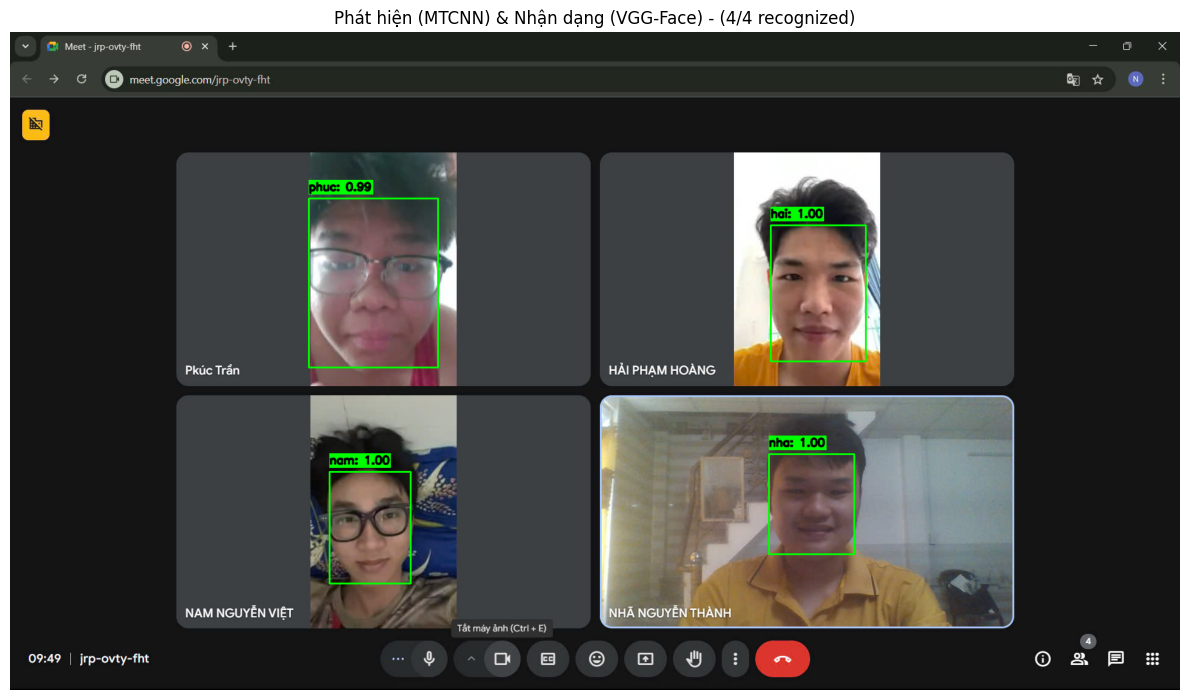

In [5]:
import cv2
import numpy as np
from mtcnn import MTCNN
from deepface import DeepFace
import os
import matplotlib.pyplot as plt
import time
import pandas as pd

input_image_path = '/content/anhtest.jpg'

db_path = "/content/drive/MyDrive/nhanamhaiphuc10anh"

recognition_model_name = "VGG-Face"

distance_metric = "cosine"

recognition_threshold = None

print("[INFO] Khởi tạo bộ phát hiện MTCNN...")
try:
    detector = MTCNN()
    print("[INFO] MTCNN đã sẵn sàng.")
except Exception as e:
    print(f"[ERROR] Không thể khởi tạo MTCNN: {e}")
    print("Hãy chắc chắn bạn đã cài đặt thư viện mtcnn và các phụ thuộc (như tensorflow).")
    exit()


def draw_bounding_box(img, x, y, w, h, name, confidence=None, color=(0, 255, 0), thickness=2):
    """Vẽ bounding box và tên lên ảnh."""
    cv2.rectangle(img, (x, y), (x + w, y + h), color, thickness)

    text = name
    if confidence is not None:
        if confidence > 0:
             text += f": {confidence:.2f}"

    (text_width, text_height), baseline = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, 0.6, thickness // 2 + 1)
    text_y = y - 10 if y - 10 > text_height else y + h + text_height + baseline + 5
    text_x = x

    cv2.rectangle(img, (text_x, text_y - text_height - baseline), (text_x + text_width, text_y + baseline // 2), color, cv2.FILLED)
    cv2.putText(img, text, (text_x, text_y - baseline // 2), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), thickness // 2 + 1, cv2.LINE_AA)

def detect_and_recognize(image_path, db_path, model_name, metric, threshold=None):
    """Phát hiện và nhận dạng khuôn mặt trong ảnh."""
    if not os.path.exists(image_path):
        print(f"[ERROR] Không tìm thấy ảnh đầu vào tại: {image_path}")
        return
    img_bgr = cv2.imread(image_path)
    if img_bgr is None:
        print(f"[ERROR] Không thể đọc ảnh: {image_path}")
        return
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    height, width, _ = img_rgb.shape
    print(f"[INFO] Đã tải ảnh: {image_path} (Kích thước: {width}x{height})")

    if not os.path.isdir(db_path):
        print(f"[ERROR] Đường dẫn database không tồn tại hoặc không phải thư mục: {db_path}")
        print("Vui lòng tạo thư mục database và các thư mục con chứa ảnh khuôn mặt đã biết.")
        return

    start_time = time.time()
    print("[INFO] Bắt đầu phát hiện khuôn mặt bằng MTCNN...")
    try:
        detections = detector.detect_faces(img_rgb)
    except Exception as e:
        print(f"[ERROR] Lỗi xảy ra trong quá trình phát hiện khuôn mặt MTCNN: {e}")
        if "The layer sequential" in str(e) and "has no defined input" in str(e):
             print("[INFO] Lỗi này thường do xung đột phiên bản Keras/TensorFlow.")
             print("Hãy thử downgrade Keras về phiên bản 2.15 hoặc cũ hơn (ví dụ: pip install keras==2.15.0)")
             print("Bạn cũng có thể cần downgrade TensorFlow tương ứng (ví dụ: pip install tensorflow==2.15.0)")
        return

    detection_time = time.time() - start_time
    print(f"[INFO] Phát hiện xong {len(detections)} khuôn mặt trong {detection_time:.2f} giây.")

    if not detections:
        print("[INFO] Không tìm thấy khuôn mặt nào trong ảnh.")
        plt.figure(figsize=(10, 8))
        plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
        plt.title("Không tìm thấy khuôn mặt")
        plt.axis('off')
        plt.show()
        return

    output_img = img_bgr.copy()
    if threshold is None:
        try:
            threshold = DeepFace.verification.find_threshold(model_name, metric)
            print(f"[INFO] Sử dụng ngưỡng đề xuất ({metric}): {threshold:.3f} cho model '{model_name}'")
        except ValueError:
            threshold = 0.40 if metric == 'cosine' else 0.6
            print(f"[WARNING] Không tìm thấy ngưỡng đề xuất cho '{model_name}'/'{metric}'. Sử dụng giá trị mặc định: {threshold}")


    print("[INFO] Bắt đầu nhận dạng các khuôn mặt...")
    recognition_start_time = time.time()
    recognized_count = 0

    for i, detection in enumerate(detections):
        x, y, w, h = detection['box']
        confidence = detection.get('confidence', 0.0)

        x, y = max(0, x), max(0, y)
        x2, y2 = min(width, x + w), min(height, y + h)
        w_valid, h_valid = x2 - x, y2 - y

        if w_valid <= 0 or h_valid <= 0:
            print(f"[WARNING] Bỏ qua bounding box không hợp lệ: {(x,y,w,h)} -> Kích thước hiệu dụng: {(w_valid, h_valid)}")
            continue

        face_crop = img_bgr[y:y2, x:x2]
        if face_crop.size == 0:
            print(f"[WARNING] Vùng cắt khuôn mặt trống tại box {(x,y,w,h)}, bỏ qua.")
            continue

        identity = "Unknown"
        min_distance = float('inf')

        try:
            dfs = DeepFace.find(img_path=face_crop,
                                db_path=db_path,
                                model_name=model_name,
                                distance_metric=metric,
                                enforce_detection=False,
                                detector_backend='skip',
                                align=True,
                                silent=True)

            best_match_df = None
            if isinstance(dfs, list) and len(dfs) > 0 and isinstance(dfs[0], pd.DataFrame) and not dfs[0].empty:
                best_match_df = dfs[0]
            elif isinstance(dfs, pd.DataFrame) and not dfs.empty:
                 best_match_df = dfs

            if best_match_df is not None:
                 best_match = best_match_df.iloc[0]
                 distance_col_specific = f"{model_name}_{metric}"
                 distance_col_generic = "distance"

                 current_distance = float('inf')

                 if distance_col_specific in best_match:
                    current_distance = best_match[distance_col_specific]
                 elif distance_col_generic in best_match:
                     current_distance = best_match[distance_col_generic]
                 else:
                     print(f"[WARNING] Không tìm thấy cột khoảng cách nào ('{distance_col_specific}' hoặc '{distance_col_generic}') trong kết quả DeepFace.find cho khuôn mặt {i+1}. Các cột có là: {best_match_df.columns}")
                     identity = "Error"

                 min_distance = current_distance

                 if identity != "Error":
                     if min_distance <= threshold:
                         identity_path = best_match['identity']
                         identity = os.path.basename(os.path.dirname(identity_path.replace("\\", "/")))
                         recognized_count += 1
                     else:
                         identity = "Unknown"

            else:
                 identity = "Unknown"

            color = (0, 0, 255) if identity in ["Unknown", "Error"] else (0, 255, 0)
            draw_bounding_box(output_img, x, y, w_valid, h_valid, identity, confidence, color=color)
            print(f"  - Khuôn mặt {i+1}: Box({x},{y},{w_valid},{h_valid}), MTCNN Conf: {confidence:.3f} -> Nhận dạng: {identity} (Dist: {'{:.3f}'.format(min_distance) if min_distance != float('inf') else 'N/A'})")


        except ValueError as ve:
             print(f"[WARNING] Lỗi giá trị khi xử lý khuôn mặt {i+1} tại {(x,y,w,h)} với DeepFace: {ve}. Gán là 'Error'.")
             draw_bounding_box(output_img, x, y, w_valid, h_valid, "Error", confidence, color=(0,0,255))
        except Exception as e:
            print(f"[ERROR] Lỗi không xác định khi xử lý khuôn mặt {i+1}: {e}")
            if "The layer sequential" in str(e) and "has no defined input" in str(e):
                 print("[INFO] Lỗi này thường do xung đột phiên bản Keras/TensorFlow.")
                 print("Hãy thử downgrade Keras về phiên bản 2.15 hoặc cũ hơn (ví dụ: pip install keras==2.15.0)")
                 print("Bạn cũng có thể cần downgrade TensorFlow tương ứng (ví dụ: pip install tensorflow==2.15.0)")
            import traceback
            traceback.print_exc()
            draw_bounding_box(output_img, x, y, w_valid, h_valid, "Error", confidence, color=(0,0,255))


    recognition_time = time.time() - recognition_start_time
    print(f"[INFO] Hoàn thành nhận dạng {len(detections)} khuôn mặt trong {recognition_time:.2f} giây.")
    print(f"[INFO] Số khuôn mặt nhận dạng được (khác Unknown/Error): {recognized_count}/{len(detections)}")

    output_img_rgb = cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(12, 10))
    plt.imshow(output_img_rgb)
    plt.title(f'Phát hiện (MTCNN) & Nhận dạng ({model_name}) - ({recognized_count}/{len(detections)} recognized)')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    try:
        import pandas as pd
    except ImportError:
        print("[ERROR] Thư viện 'pandas' chưa được cài đặt. Vui lòng chạy: pip install pandas")
        exit()

    detect_and_recognize(input_image_path, db_path, recognition_model_name, distance_metric, recognition_threshold)